<a href="https://colab.research.google.com/github/Ratnakar2022/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Importing Libraries**

In [2]:
# Import necessary libraries

import numpy as np
from numpy import math

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import pandas as pd
pd.pandas.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import SelectFromModel

from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

import xgboost as xgb
from xgboost import plot_importance

import lightgbm 

**Mount the drive and load data**

In [3]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# reading csv files, we need to use "encoding" cause it is showing error of unicode error
bike_data=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Seoul Bike Sharing Demand Prediction - Ratnakar gupta/Bike Sharing Demand Prediction-20220917T105836Z-001/Bike Sharing Demand Prediction/Data _ Resources/SeoulBikeData.csv",encoding= 'unicode_escape')

**X-ray of the data**

In [5]:
# Fisrt 5 values.
bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# Last 5 values.
bike_data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
#summary of the data type
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
# Total rows and column in data
bike_data.shape

(8760, 14)

In [9]:
# Check null values
bike_data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

We have total 8760 rows in our data and having 14 column in which Date, Seasons, Holiday, Functioning day is a catgorical type and rest are numerical type.
We have seen that none of column have null values.

In [10]:
# #Describe the data
bike_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


 **Exploratory Data Analysis and Visualization**

In [11]:
# columns in our dataset

bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [12]:
# finding the type of data of 'Date' column

type(bike_data['Date'][0])

str

In [13]:
# converting string format of 'Date' column into date-time format

bike_data['Date'] = pd.to_datetime(bike_data['Date'])

In [14]:
# all the seasons present in data

bike_data['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [15]:
# creating a column containing the year from a particular date

year = []
for i in range(len(bike_data['Date'])):
  year.append(bike_data['Date'][i].year)
bike_data['year'] = year  

# creating a column containing the month number from a particular date

months = []
for i in range(len(bike_data['Date'])):
  months.append(bike_data['Date'][i].month)
bike_data['month'] = months  

In [16]:
# creating a dataframe containing the sum of all column values pertaining to differant seasons

bike_data_s = bike_data.groupby('Seasons').sum()

bike_data_s

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year,month
Seasons,,,,,,,,,,,,
Autumn,1790002,25116,30839.9,129355,3264.5,3408683,12009.2,1139.65,268.1,123.0,4407312,18816
Spring,1611909,25392,28807.1,129779,4139.1,2738725,9097.1,1520.84,403.8,0.0,4455744,10992
Summer,2283234,25392,58694.8,143479,3553.6,3315854,41400.3,1680.85,559.7,0.0,4455744,15048
Winter,487169,24840,-5487.4,107449,4153.0,3123332,-26820.0,644.07,70.9,534.6,4358136,12312


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3171eaac50>],
      dtype=object)

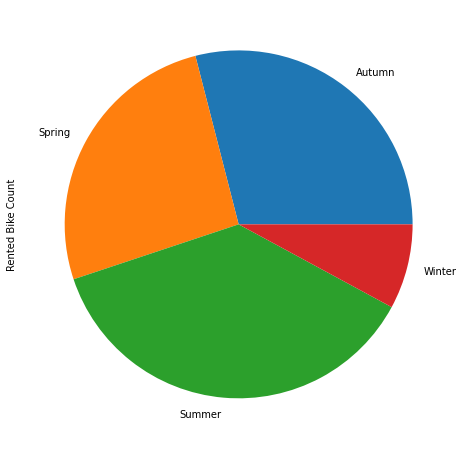

In [17]:
# creating a pie chart of bike count in differant seasons

bike_data_s['Rented Bike Count'].plot(kind='pie', subplots=True, figsize=(8, 8))

As we can see that most of the bike have been rented in Summer.
And less bike rented in Winter

In [18]:
# creating a dataframe which contains rented bike counts in each seasaon
df_seasons  = bike_data.groupby('Seasons').sum()['Rented Bike Count']

df_seasons

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64

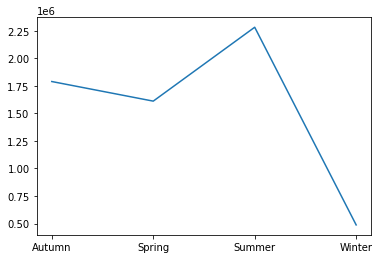

In [19]:
# Line plot showing the differance in rent rate in differant seasons 

plt.plot(df_seasons)
plt.show()

As we can see that also in this graph that the in Summer, count of rented bike count going up and going down in Winter season. 

In [20]:
# creating a series which shows total number of bikes rented in each year

df_year = bike_data.groupby('year').sum()['Rented Bike Count']
df_year

year
2017     185330
2018    5986984
Name: Rented Bike Count, dtype: int64

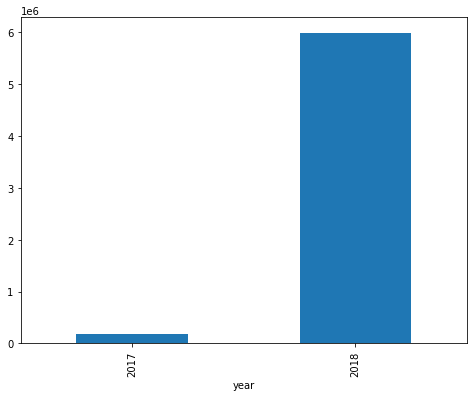

In [21]:
# Creating graph for bike rented count year wise
fig, ax = plt.subplots(figsize=(8,6))
df_year.plot(kind='bar', ax=ax)



From the above bar Chart we can say that most number of bike rented in 2018, It may be the reason that we do not have all data of 2017

In [22]:
# creating a series which shows total number of bikes rented on the type of day

df_hol = bike_data.groupby('Holiday').sum()['Rented Bike Count']

In [23]:
df_hol

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

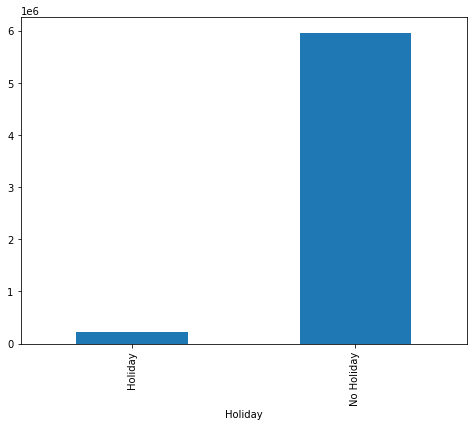

In [24]:
# Plot for Most time bike rented in working days
fig, ax = plt.subplots(figsize=(8,6))
df_hol.plot(kind='bar', ax=ax)

BY the above pic we can say that most number of rented bike count is on "No Holiday"  means working day.

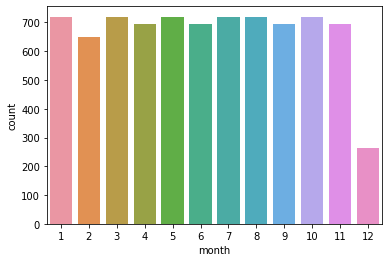

In [25]:
# plot showing the bikes rented in differant months in the year 2018

sns.countplot(bike_data.loc[bike_data['year']==2018,'month'])

As we have seen in above that in Summer season rented bike count is high and Winter has low count in December

In [26]:
# creating a dataframe containing the count of bikes rented in differant intensities of rainfall

df_rain = pd.DataFrame(bike_data.groupby('Rainfall(mm)')['Rented Bike Count'].sum())


In [27]:
# resetting index of the dataframe

df_rain.reset_index(inplace=True)
df_rain.head()

,Rainfall(mm),Rented Bike Count
0,0.0,6086009
1,0.1,15179
2,0.2,3706
3,0.3,1401
4,0.4,2147


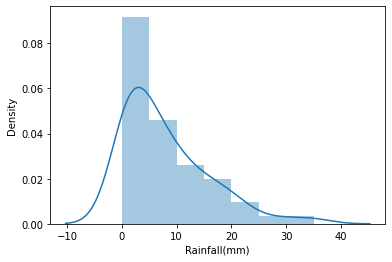

In [28]:
# plot showing distribution of bike rentals according to rainfall intensity

sns.distplot(df_rain['Rainfall(mm)'])

As we can see that people rent more bike when there is no rainfall or less rainfall

In [29]:
# creating a dataframe containing the count of bikes rented in differant intensities of snowfall

df_snow = pd.DataFrame(bike_data.groupby('Snowfall (cm)')['Rented Bike Count'].sum())

In [30]:
df_snow.reset_index(inplace=True)
df_snow.head()

,Snowfall (cm),Rented Bike Count
0,0.0,6090314
1,0.1,205
2,0.2,3643
3,0.3,8304
4,0.4,5981


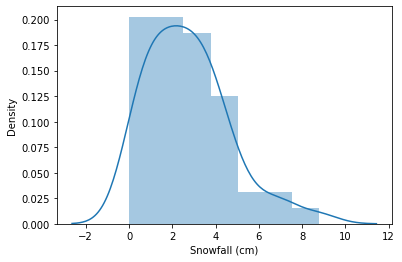

In [31]:
# plot showing distribution of bike rentals according to snowfall intensity

sns.distplot(df_snow['Snowfall (cm)'])

Above plot shown that people do rent more bike when there is no or less snow fall

In [32]:
# creating a dataframe containing the count of bikes rented in differant intensities of rainfall

df_temp = pd.DataFrame(bike_data.groupby('Temperature(°C)')['Rented Bike Count'].sum())
df_temp.reset_index(inplace=True)
df_temp.head()

,Temperature(°C),Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96


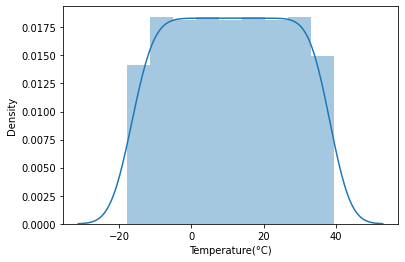

In [33]:
# plot showing distribution of bike rentals according to temperature intensity

sns.distplot(df_temp['Temperature(°C)'])

We can see that in above plot ,people tend to rent bikes when the temperature is between -5 to 25 degrees and when reach to 40 degrees then we can see the downfall.

In [34]:
# creating a dataframe containing the count of bikes rented in differant visibility ranges

df_visi = pd.DataFrame(bike_data.groupby('Visibility (10m)')['Rented Bike Count'].sum())
df_visi.reset_index(inplace=True)
df_visi.head()

,Visibility (10m),Rented Bike Count
0,27,83
1,33,33
2,34,24
3,38,98
4,53,65


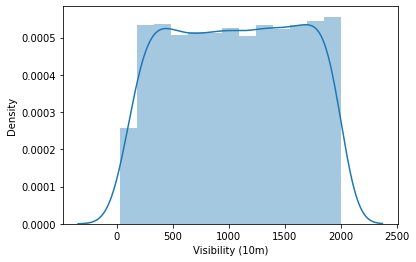

In [35]:
sns.distplot(df_visi['Visibility (10m)'])

Above plot shows that people tend to rent bikes when the visibility is between 300 to 1700.

**Preprocessing the data**

In [36]:
# encoding the season names

bike_data['Winter'] = np.where(bike_data['Seasons']=='Winter', 1, 0)
bike_data['Spring'] = np.where(bike_data['Seasons']=='Spring', 1, 0)
bike_data['Summer'] = np.where(bike_data['Seasons']=='Summer', 1, 0)
bike_data['Autumn'] = np.where(bike_data['Seasons']=='Autumn', 1, 0)

bike_data.drop(columns=['Seasons'],axis=1,inplace=True)

In [37]:
# encoding 'Holiday' column with 0 and 1

for i in range(len(bike_data['Holiday'])):
  if bike_data['Holiday'][i] == 'No Holiday':
    bike_data['Holiday'][i] = 0
  else:
    bike_data['Holiday'][i] = 1 

In [38]:
# encoding 'Functioning Day' column with 0 and 1

for i in range(len(bike_data['Functioning Day'])):
  if bike_data['Functioning Day'][i] == 'Yes':
    bike_data['Functioning Day'][i] = 1
  else:
    bike_data['Functioning Day'][i] = 0 

In [39]:
# to check data for encoding in Holiday ,Functioning day and Season
bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,year,month,Winter,Spring,Summer,Autumn
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0


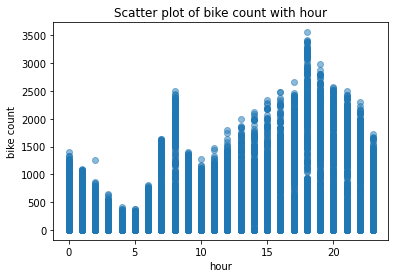

In [40]:
# scatter plot of bike count at hour of a particular day

plt.scatter(bike_data['Hour'], bike_data['Rented Bike Count'], alpha=0.5)
plt.title('Scatter plot of bike count with hour')
plt.xlabel('hour')
plt.ylabel('bike count')
plt.show()

We can see that in above graph, in the morning and evening poeple tend to do more rent bike for offices or school.

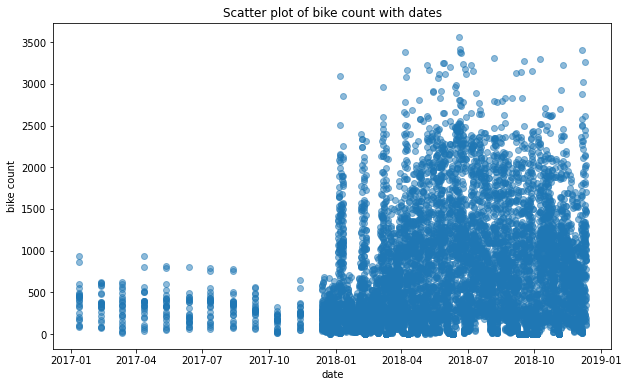

In [41]:
# scatter plot of bike count on differant dates

plt.figure(figsize=(10,6))
plt.scatter(bike_data['Date'], bike_data['Rented Bike Count'], alpha=0.5)
plt.title('Scatter plot of bike count with dates')
plt.xlabel('date')
plt.ylabel('bike count')
plt.show()

From the above graph it is clear that in year 2018 people rented more or increases bike in comparision of year 2017

In [42]:
# finding the inter-quartile range 

Q1 = bike_data.quantile(0.25)
Q3 = bike_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented Bike Count             874.25
Hour                           11.50
Temperature(°C)                19.00
Humidity(%)                    32.00
Wind speed (m/s)                1.40
Visibility (10m)             1060.00
Dew point temperature(°C)      19.50
Solar Radiation (MJ/m2)         0.93
Rainfall(mm)                    0.00
Snowfall (cm)                   0.00
year                            0.00
month                           6.00
Winter                          0.00
Spring                          1.00
Summer                          1.00
Autumn                          0.00
dtype: float64


In [43]:
# listing features to remove outliers

features = list(bike_data.columns)
features = features[2:]
list_0 = ['Hour','Winter','Spring','Summer','Autumn','Holiday','Functioning Day','month','year']
new_features = [x for x in features if x not in list_0]
new_features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [44]:
# removing outliers

bike_data[new_features] = bike_data[new_features][~((bike_data[new_features] < (Q1 - 1.5 * IQR)) |(bike_data[new_features] > (Q3 + 1.5 * IQR))).any(axis=1)]
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            7078 non-null   float64       
 4   Humidity(%)                7078 non-null   float64       
 5   Wind speed (m/s)           7078 non-null   float64       
 6   Visibility (10m)           7078 non-null   float64       
 7   Dew point temperature(°C)  7078 non-null   float64       
 8   Solar Radiation (MJ/m2)    7078 non-null   float64       
 9   Rainfall(mm)               7078 non-null   float64       
 10  Snowfall (cm)              7078 non-null   float64       
 11  Holiday                    8760 non-null   object        
 12  Functi

In [45]:
# filling null values with mean values
bike_data['Temperature(°C)'] = bike_data['Temperature(°C)'].fillna(bike_data['Temperature(°C)'].mean())
bike_data['Humidity(%)'] = bike_data['Humidity(%)'].fillna(bike_data['Humidity(%)'].mean())
bike_data['Wind speed (m/s)'] = bike_data['Wind speed (m/s)'].fillna(bike_data['Wind speed (m/s)'].mean())
bike_data['Visibility (10m)'] = bike_data['Visibility (10m)'].fillna(bike_data['Visibility (10m)'].mean())
bike_data['Dew point temperature(°C)'] = bike_data['Dew point temperature(°C)'].fillna(bike_data['Dew point temperature(°C)'].mean())
bike_data['Solar Radiation (MJ/m2)'] = bike_data['Solar Radiation (MJ/m2)'].fillna(bike_data['Solar Radiation (MJ/m2)'].mean())
bike_data['Rainfall(mm)'] = bike_data['Rainfall(mm)'].fillna(bike_data['Rainfall(mm)'].mean())
bike_data['Snowfall (cm)'] = bike_data['Snowfall (cm)'].fillna(bike_data['Snowfall (cm)'].mean())

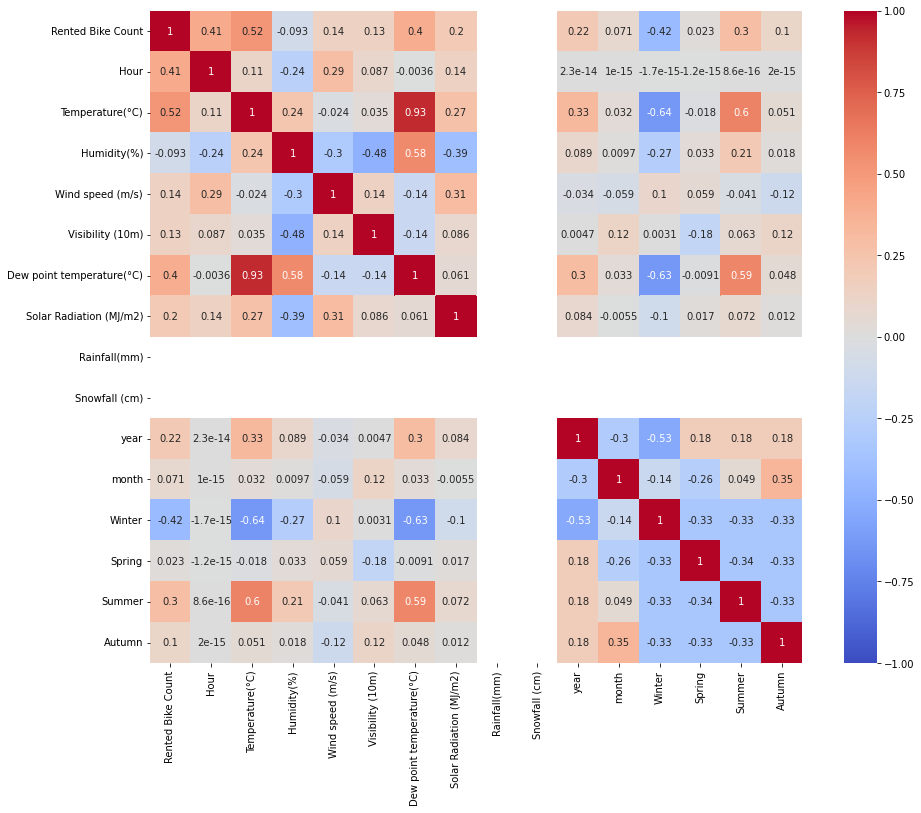

In [46]:
# extracting correlation heatmap

plt.figure(figsize=(15,12))
sns.heatmap(bike_data.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)


In [47]:
# dropping columns with more (or less) correlation

bike_data.drop(columns=['Dew point temperature(°C)','Date','Rainfall(mm)','Snowfall (cm)','year'],axis=1,inplace=True)

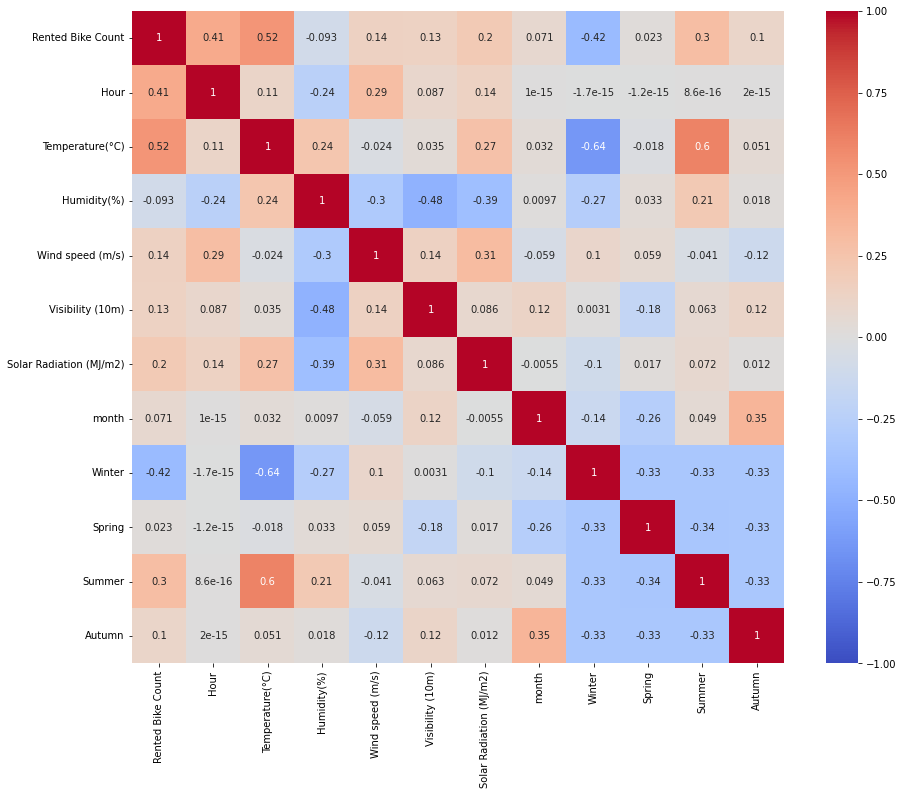

In [48]:
# extracting correlation heatmap

plt.figure(figsize=(15,12))
sns.heatmap(bike_data.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

In [49]:
# function to calculate Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [50]:
# multicollinearity result

calc_vif(bike_data[[i for i in bike_data.describe().columns if i not in ['Rented Bike Count','Date']]])

,variables,VIF
0,Hour,1.186328
1,Temperature(°C),2.871155
2,Humidity(%),2.137895
3,Wind speed (m/s),1.264894
4,Visibility (10m),1.503631
5,Solar Radiation (MJ/m2),1.591228
6,month,1.211705
7,Winter,16.509521
8,Spring,17.996409
9,Summer,22.666811


In [51]:
# dropping "summer" column as it adds to multicollinearity

bike_data.drop(columns=['Summer'],axis=1,inplace=True)

In [52]:
calc_vif(bike_data[[i for i in bike_data.describe().columns if i not in ['Rented Bike Count','Date']]])

,variables,VIF
0,Hour,4.232652
1,Temperature(°C),6.982894
2,Humidity(%),10.146646
3,Wind speed (m/s),5.800116
4,Visibility (10m),7.565901
5,Solar Radiation (MJ/m2),2.203240
6,month,5.226156
7,Winter,3.829748
8,Spring,2.343245
9,Autumn,2.386321


In [53]:
# checking types of columns
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   float64
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   float64
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Holiday                  8760 non-null   object 
 8   Functioning Day          8760 non-null   object 
 9   month                    8760 non-null   int64  
 10  Winter                   8760 non-null   int64  
 11  Spring                   8760 non-null   int64  
 12  Autumn                   8760 non-null   int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 889.8+ KB


In [54]:
# converting object type columns to float

bike_data['Functioning Day'] = bike_data['Functioning Day'].astype(float)
bike_data['Holiday'] = bike_data['Holiday'].astype(float)

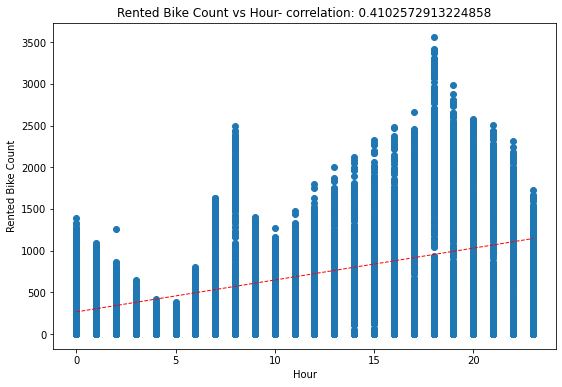

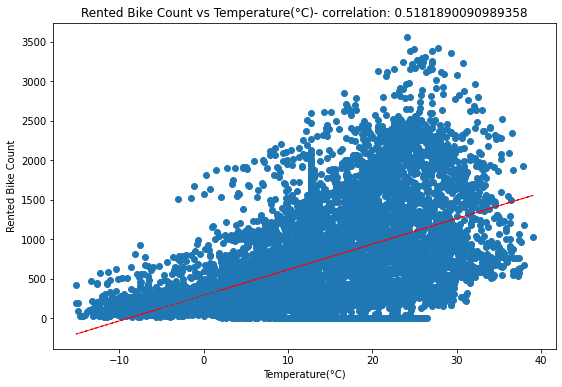

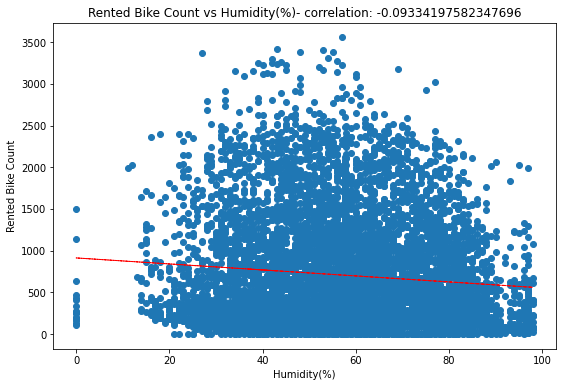

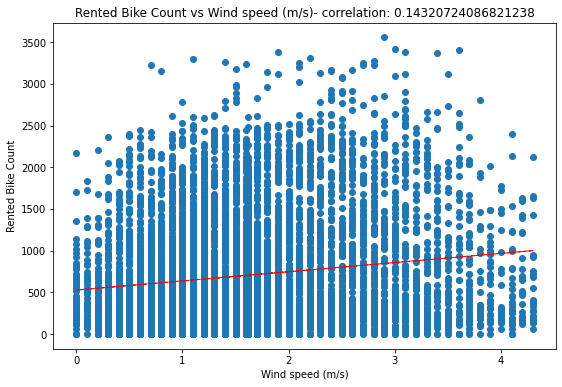

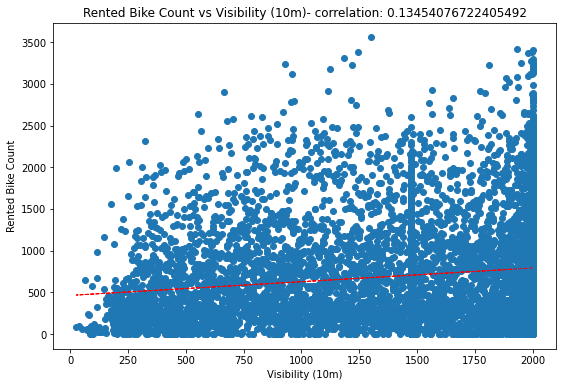

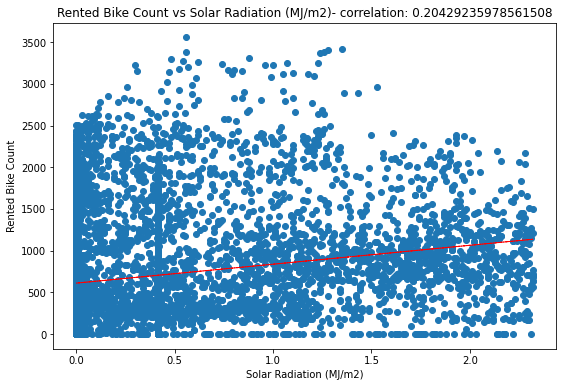

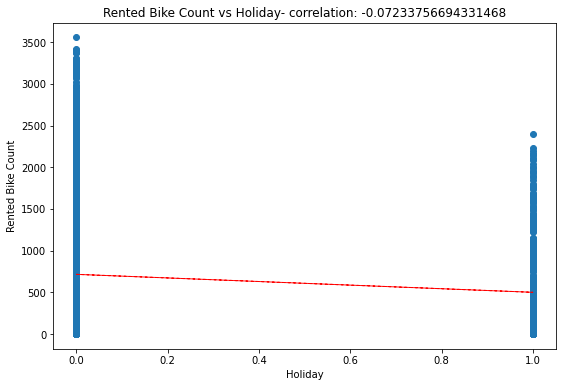

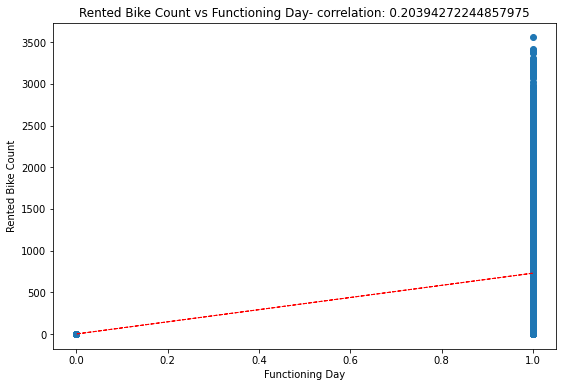

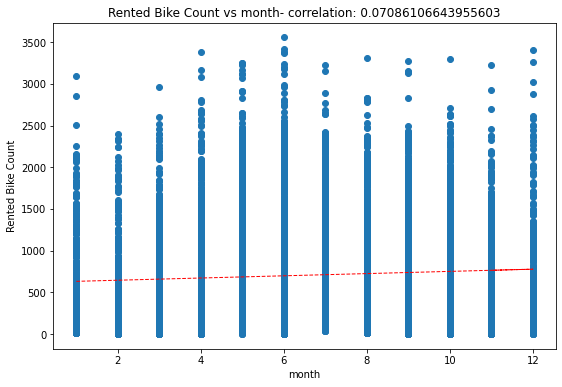

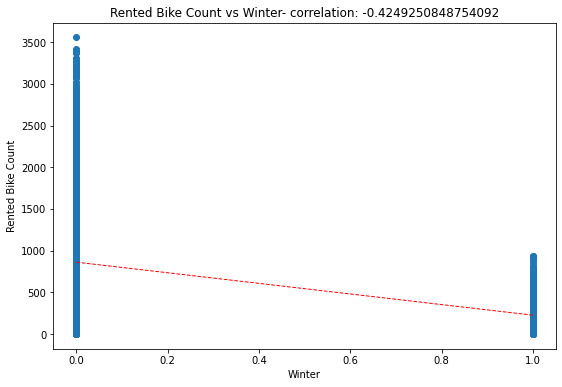

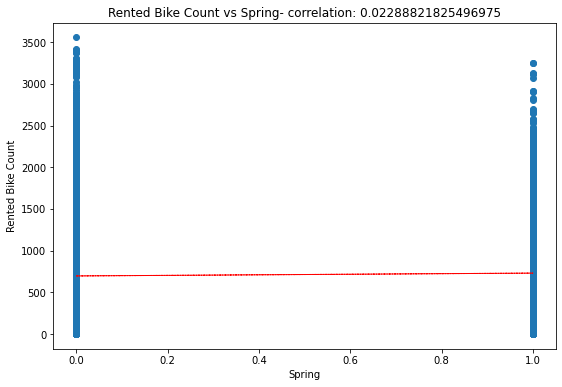

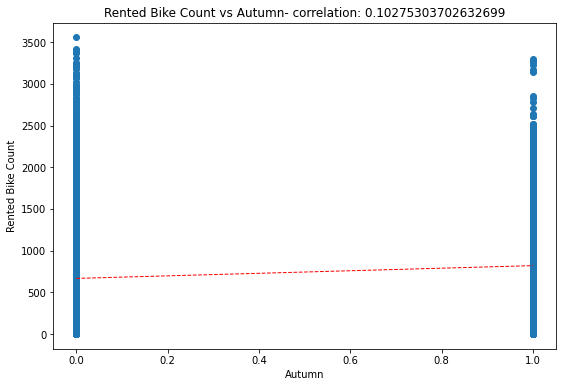

In [55]:
# obtaining correlation plots between dependent and independent variables

numeric_features = bike_data.columns
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(bike_data[col], bike_data['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(bike_data[col])

    plt.plot(bike_data[col], y_hat, "r--", lw=1)

plt.show()

**Let's Do Modeling**

In [56]:
# Creating the data of independent variables
Y = bike_data['Rented Bike Count']

# Create the dependent variable data
X = bike_data.drop(columns=['Rented Bike Count'],axis=1).values

X

array([[ 0. , -5.2, 37. , ...,  1. ,  0. ,  0. ],
       [ 1. , -5.5, 38. , ...,  1. ,  0. ,  0. ],
       [ 2. , -6. , 39. , ...,  1. ,  0. ,  0. ],
       ...,
       [21. ,  2.6, 39. , ...,  0. ,  0. ,  1. ],
       [22. ,  2.1, 41. , ...,  0. ,  0. ,  1. ],
       [23. ,  1.9, 43. , ...,  0. ,  0. ,  1. ]])

In [57]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [58]:
# Transforming data

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Linear regression model**

In [59]:
# Fitting Multiple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [60]:
# Predicting the Train set results

Y_pred_train = regressor.predict(X_train)

# Predicting the Test set results

Y_pred_test = regressor.predict(X_test)

# r2 score of train set

r2_linear_train = r2_score(Y_train, Y_pred_train)

r2_linear_train

0.50903798357405

In [61]:
r2_linear_test = r2_score(Y_test, Y_pred_test)


In [113]:
# different metrics used

MSE  = mean_squared_error(Y_test,Y_pred_test)
print("MSE :" , MSE)

RMSE_LinearRegression = np.sqrt(MSE)
print("RMSE :" ,RMSE_LinearRegression)

r2_linear_test = r2_score(Y_test,Y_pred_test)
print("R2 :" ,r2_linear_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 202937.66869256625
RMSE : 450.4860360683406
R2 : 0.5151094008043045
Adjusted R2 :  0.5117634047201478


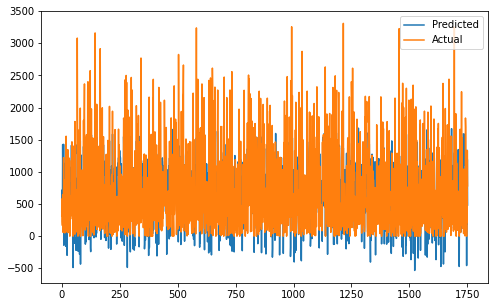

In [63]:
# plotting results from above model

plt.figure(figsize=(8,5))
plt.plot((Y_pred_test))
plt.plot(np.array((Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

**Lasso regression model**

In [64]:
### Cross validation ###

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [0.8,1,10,20,40,80,100,300,700,1000]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.8, 1, 10, 20, 40, 80, 100, 300, 700,
                                   1000]},
             scoring='neg_mean_squared_error')

In [65]:
# getting best parameters

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.8}

Using  {'alpha': 0.8}  the negative mean squared error is:  -205096.00188867253


In [66]:
Y_pred_lasso = lasso_regressor.predict(X_test)

In [112]:
# different metrics used

MSE  = mean_squared_error(Y_test,Y_pred_lasso)
print("MSE :" , MSE)

RMSE_lasso_regressor = np.sqrt(MSE)
print("RMSE :" ,RMSE_lasso_regressor)

r2_lasso_test = r2_score(Y_test,Y_pred_lasso)
print("R2 :" ,r2_lasso_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 203516.67879838907
RMSE : 451.1282287757984
R2 : 0.5137259387838644
Adjusted R2 :  0.5103703960957715


**Ridge regression model**

In [68]:
# training model

from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1,0.001,10,20,35,60,70,100,800,1200]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1, 0.001, 10, 20, 35, 60, 70, 100, 800,
                                   1200]},
             scoring='neg_mean_squared_error')

In [69]:
# getting best parameters

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -204891.04307324535


In [70]:
Y_pred_ridge = ridge_regressor.predict(X_test)

In [111]:
# evaluating metrics

MSE  = mean_squared_error(Y_test,Y_pred_ridge)
print("MSE :" , MSE)

RMSE_ridge_regressor = np.sqrt(MSE)
print("RMSE :" ,RMSE_ridge_regressor)

r2_ridge_test = r2_score(Y_test,Y_pred_ridge)
print("R2 :" ,r2_ridge_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 203018.4447646066
RMSE : 450.5756815060114
R2 : 0.5149163979072836
Adjusted R2 :  0.5103703960957715


**Decision-tree regression model**

In [72]:
# training model

from sklearn.tree import DecisionTreeRegressor
decisionTree = DecisionTreeRegressor()

param = {'max_depth' : [1,4,5,6,7,10,15,20,8]}

gridSearch_decisionTree=GridSearchCV(decisionTree,param,scoring='r2',cv=6)
gridSearch_decisionTree.fit(X_train,Y_train)


best_DecisionTree=gridSearch_decisionTree.best_estimator_
bestDecisionTree_testScore=best_DecisionTree.score(X_test,Y_test)
r2_decision_test = best_DecisionTree.score(X_test,Y_test)

In [73]:
# extracting best parameters

print(f"The best Decision Tree R2 score is {gridSearch_decisionTree.best_score_} with max depth {gridSearch_decisionTree.best_params_['max_depth']}")
print('\n')
print(f"The best R2 test score is : {bestDecisionTree_testScore} with max depth = {gridSearch_decisionTree.best_params_['max_depth']}")

The best Decision Tree R2 score is 0.7756758614832537 with max depth 10


The best R2 test score is : 0.7950147954316321 with max depth = 10


In [75]:
Y_gridSearch_decisionTree = gridSearch_decisionTree.predict(X_test)

In [110]:
# different metrics used

MSE  = mean_squared_error(Y_test,Y_gridSearch_decisionTree)
print("MSE :" , MSE)

RMSE_gridSearch_decisionTree = np.sqrt(MSE)
print("RMSE :" ,RMSE_gridSearch_decisionTree)

r2_decision_test = r2_score(Y_test,Y_gridSearch_decisionTree)
print("R2 :" ,r2_decision_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_gridSearch_decisionTree))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 85790.93841079905
RMSE : 292.9009020313851
R2 : 0.7950147954316321
Adjusted R2 :  0.7936002914323104


**Random forest regression model**

In [78]:
# training model

from sklearn.ensemble import RandomForestRegressor
randomForestAlgo = RandomForestRegressor()


param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=20, num=5)], 
         'max_depth' : [10,15,20],
         'min_samples_split':[2,4],
         'min_samples_leaf':[1,2],
         'bootstrap' : [True,False]
        }

gridSearch_RandomForest=GridSearchCV(randomForestAlgo,param,scoring='r2',cv=5)
gridSearch_RandomForest.fit(X_train,Y_train)

best_randomForest=gridSearch_RandomForest.best_estimator_
bestRandomForest_testScore=best_randomForest.score(X_test,Y_test)
r2_randomforest_test = best_randomForest.score(X_test,Y_test)

In [79]:
# getting best parameters

print(f"The best Random Forest R2 train score is : {gridSearch_RandomForest.best_score_} with n estimators = {gridSearch_RandomForest.best_params_['n_estimators']}, max depth : {gridSearch_RandomForest.best_params_['max_depth']}, min samples split : {gridSearch_RandomForest.best_params_['min_samples_split']} and min samples leaf : {gridSearch_RandomForest.best_params_['min_samples_leaf']}")
print('\n')
print(f"The best Random Forest R2 test score is : {bestRandomForest_testScore} with n estimators = {gridSearch_RandomForest.best_params_['n_estimators']}, max depth : {gridSearch_RandomForest.best_params_['max_depth']}, min samples split : {gridSearch_RandomForest.best_params_['min_samples_split']} and min samples leaf : {gridSearch_RandomForest.best_params_['min_samples_leaf']}")


The best Random Forest R2 train score is : 0.8292778723051855 with n estimators = 17, max depth : 15, min samples split : 2 and min samples leaf : 2


The best Random Forest R2 test score is : 0.8495288685854925 with n estimators = 17, max depth : 15, min samples split : 2 and min samples leaf : 2


In [84]:
Y_gridSearch_RandomForest = gridSearch_RandomForest.predict(X_test)

In [109]:
# different metrics used

MSE  = mean_squared_error(Y_test,Y_gridSearch_RandomForest)
print("MSE :" , MSE)

RMSE_gridSearch_RandomForest = np.sqrt(MSE)
print("RMSE :" ,RMSE_gridSearch_RandomForest)

r2_randomforest_test = r2_score(Y_test,Y_gridSearch_RandomForest)
print("R2 :" ,r2_randomforest_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_gridSearch_RandomForest))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 62975.56740725527
RMSE : 250.94933235068643
R2 : 0.8495288685854925
Adjusted R2 :  0.8484905399040813


**Extra-trees regression model**

In [80]:
# training model

from sklearn.ensemble import ExtraTreesRegressor
extraTreesAlgo = ExtraTreesRegressor()

param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=20, num=5)], 
         'max_depth' : [50,80,100],
         'min_samples_split':[1,4,8],
         'min_samples_leaf':[1,2,3],
         'bootstrap' : [True,False]
        }

gridSearch_ExtraTrees=GridSearchCV(extraTreesAlgo,param,scoring='r2',cv=5)
gridSearch_ExtraTrees.fit(X_train,Y_train)

best_ExtrasTrees=gridSearch_ExtraTrees.best_estimator_
bestExtrasTrees_testScore=best_ExtrasTrees.score(X_test,Y_test)
r2_extratree_test = best_ExtrasTrees.score(X_test,Y_test)

In [81]:
# getting best parameters

print(f"The best Random Forest R2 score is : {gridSearch_ExtraTrees.best_score_} with n estimators = {gridSearch_ExtraTrees.best_params_['n_estimators']}, max depth : {gridSearch_ExtraTrees.best_params_['max_depth']}, min samples split : {gridSearch_ExtraTrees.best_params_['min_samples_split']} and min samples leaf : {gridSearch_ExtraTrees.best_params_['min_samples_leaf']}")
print('\n')
print(f"The best Random Forest R2 test score is : {bestExtrasTrees_testScore} with n estimators = {gridSearch_ExtraTrees.best_params_['n_estimators']}, max depth : {gridSearch_ExtraTrees.best_params_['max_depth']}, min samples split : {gridSearch_ExtraTrees.best_params_['min_samples_split']} and min samples leaf : {gridSearch_ExtraTrees.best_params_['min_samples_leaf']}")


The best Random Forest R2 score is : 0.829679717291868 with n estimators = 20, max depth : 80, min samples split : 8 and min samples leaf : 2


The best Random Forest R2 test score is : 0.8502132339444196 with n estimators = 20, max depth : 80, min samples split : 8 and min samples leaf : 2


In [82]:
Y_gridSearch_ExtraTrees = gridSearch_ExtraTrees.predict(X_test)

In [102]:
# different metrics used

MSE  = mean_squared_error(Y_test,Y_gridSearch_ExtraTrees)
print("MSE :" , MSE)

RMSE_gridSearch_ExtraTrees = np.sqrt(MSE)
print("RMSE :" ,RMSE_gridSearch_ExtraTrees)

r2_extratree_test = r2_score(Y_test,Y_gridSearch_ExtraTrees)
print("R2 :" ,r2_extratree_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_gridSearch_ExtraTrees))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 62689.14504578861
RMSE : 250.3780043170498
R2 : 0.8502132339444196
Adjusted R2 :  0.8491796277381707


## **Result**


In [103]:
# creating a list of all model names

model_list = ['Linear regression','Lasso regression','Ridge regression','Decision Tree Regressor','Random Forest Regressor','Extra Trees Regressor']

In [104]:
# creating a list of all model r2 score results from above

result_list = [r2_linear_test,r2_lasso_test,r2_ridge_test,r2_decision_test,r2_randomforest_test,r2_extratree_test]


In [114]:
# creating a list of all model rmse score results from above
result_list_rmse = [RMSE_LinearRegression,RMSE_lasso_regressor,RMSE_ridge_regressor,RMSE_gridSearch_decisionTree,RMSE_gridSearch_RandomForest,RMSE_gridSearch_ExtraTrees]

In [115]:

# creating an empty dataframe

results_df = pd.DataFrame()

# adding above lists to the empty dataframe
results_df['model name'] = model_list
results_df['R2-score'] = result_list
results_df['RMSE'] = result_list_rmse


In [116]:
# dataframe containing results from all the above models used

results_df

,model name,R2-score,RMSE
0,Linear regression,0.515109,450.486036
1,Lasso regression,0.513726,451.128229
2,Ridge regression,0.514916,450.575682
3,Decision Tree Regressor,0.795015,292.900902
4,Random Forest Regressor,0.849529,250.949332
5,Extra Trees Regressor,0.850213,250.378004


# **Conclusion**

*   As we can see that from above data frame result, Extratrees regression model is the best model for this dataset. As we can see that Extratrees regression model have the highest R2 score and the lowest RMSE.

*  Most numbers of Bikes were rented in Summer,and Dec is the least preferred month for bike renting.

*   Majority of the client in the bike rental sector belongs to the Working class. This is evident from EDA analysis where bike demand is more on weekdays, working days in Seoul.


